# Shap implementation

In [1]:
import numpy as np
import shap
import os
import numpy as np
from PIL import Image
import tensorflow as tf  # Assuming `model` is a TensorFlow/Keras model
from sklearn.metrics import classification_report
from collections import Counter

# begin_path = 'C:/Users/jonpg/OneDrive/Documents/School/CS 770/covid_data/'
begin_path = 'C:/Users/Jon/Documents/School/CS 770/covid_data/'

c:\Users\Jon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def pre_process(image_path):
    image_path = begin_path + image_path
    original_image = Image.open(image_path)
    preprocessed_image = original_image.resize((256, 256))
    preprocessed_image = np.array(preprocessed_image) / 255.0
    return np.expand_dims(preprocessed_image, axis = 0)


In [3]:
def run_explainer(image, model_type=1):
    if model_type == 0:
        label = 'CNN'
        model_path = 'covid_classifier_v2 - best'
    elif model_type == 1:
        label = 'RESNET'
        model_path = 'covid_resnet_classifier_v2'
    elif model_type == 2:
        label='CNN + RESNET'
        model_path = 'covid_combined_classifier_v2'
    else:
        print('Need an actually integer (0,1,2) for model')
    class_names = [f'{label}-covid', f'{label}-normal']

    # Load your model (ensure you have it defined or loaded elsewhere)
    # combined_model = tf.keras.models.load_model(begin_path + 'covid_resnet_classifier_v2.h5')  # Update with actual model path
    model = tf.keras.models.load_model(begin_path + f'{model_path}.h5')  # Update with actual model path
    # define a masker that is used to mask out partitions of the input image.
    # python function to get model output; replace this function with your own model function.
    def f(preprocessed_image):
        # print(inputs.shape)
        # inputs = inputs.transpose(0,3,1,2)
        # inputs = torch.Tensor(inputs)
        # with torch.no_grad():
        #     logits = model(inputs).logits
        # print(logits)

        preds = model.predict(preprocessed_image)

        return preds
    masker = shap.maskers.Image("blur(128,128)", image.shape[1:])

    # create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values

    # max_evals=100000 took 237 min
    shap_values12500 = explainer(image, max_evals=500, batch_size=25, outputs=shap.Explanation.argsort.flip[:1])
    shap.image_plot(shap_values12500)

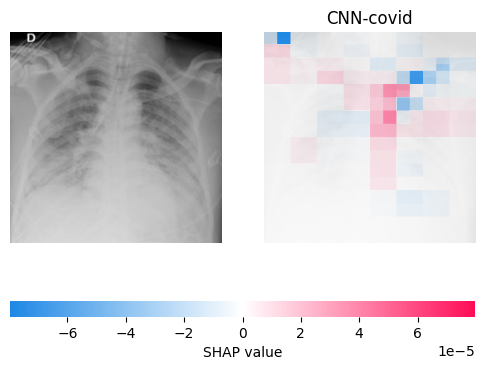

PartitionExplainer explainer: 2it [00:14, 14.08s/it]               


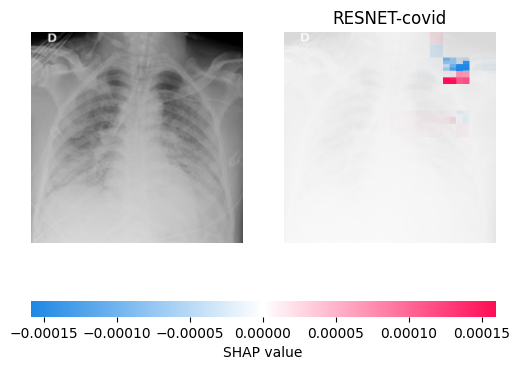

PartitionExplainer explainer: 2it [00:11, 11.22s/it]               


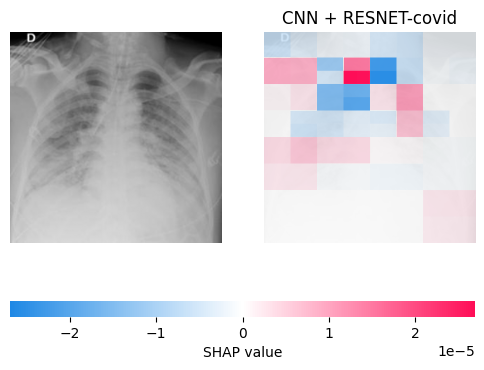

In [6]:
# Suppress the model iteration printing
tf.keras.utils.disable_interactive_logging()

# Initialize image
image = pre_process('test/covid/COVID-673.jpg')

for i in range(3):
    # print(i)
    run_explainer(image, i)

In [ ]:
# Importing Libraries

# Data Handling
import pandas as pd
import numpy as np
from collections import defaultdict
from concurrent.futures import ThreadPoolExecutor

# Efficient Looping
import itertools

# Traceback for diagnosis
import traceback

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest
import math

# Feature Selection
from sklearn.feature_selection import (
    RFECV, SelectKBest, chi2, f_classif, f_regression,
    mutual_info_classif, mutual_info_regression
)

# Machine Learning Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin,ClassifierMixin

# Preprocessing data
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer, FunctionTransformer

from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection for Cross Validation
from sklearn.model_selection import (
    StratifiedKFold, KFold, 
    RepeatedKFold, RepeatedStratifiedKFold,
    train_test_split, TimeSeriesSplit
)

# Machine Learning metrics
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    cohen_kappa_score,
    make_scorer,
    roc_curve,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix
)

# ML regressors
from sklearn.linear_model import HuberRegressor,RANSACRegressor, TheilSenRegressor, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import (
    HistGradientBoostingRegressor, StackingRegressor, 
    AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, StackingRegressor, VotingRegressor
    )
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# ML classifiers
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.ensemble import (
    HistGradientBoostingClassifier, AdaBoostClassifier, 
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier, VotingClassifier,ExtraTreesClassifier
    )
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Clustering algorithms
from sklearn.cluster import KMeans

# Fine-tuning 
import optuna

# Randomizer
import random

# Encoder of categorical variables
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# OS
import os

# Image package
from PIL import Image

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
combined = shap_values12345 + shap_values12500

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


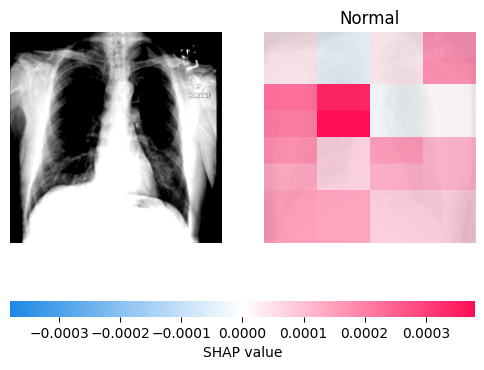

In [ ]:
shap.image_plot(combined)

## Combine Shapley Values

In [ ]:
import numpy as np
import shap

In [ ]:
from datasets import load_dataset

dataset = load_dataset('imagefolder', data_dir='jpeg')

In [ ]:

class_names = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']

In [ ]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained("covid_radiology_classification")

In [ ]:
# python function to get model output; replace this function with your own model function.
import tensorflow as tf
def f(inputs):
    # print(inputs.shape)
    inputs = inputs.transpose(0,3,1,2)
    inputs = torch.Tensor(inputs)
    with torch.no_grad():
        logits = model(inputs).logits
    # print(logits)
    return logits.numpy()

In [ ]:
from transformers import AutoImageProcessor
import torch

image_processor = AutoImageProcessor.from_pretrained("covid_radiology_classification")


(1, 224, 224, 3)

In [ ]:
test_set = dataset['train']
start_index = 10000
iterations = 10
predictions = []
all_values = None

for i in range(start_index, start_index + iterations):
    image = test_set[i]['image']
    inputs = image_processor(image, return_tensors="pt")
    x_test = inputs['pixel_values'].numpy()
    x_trans = x_test.transpose(0,2,3,1)

    # define a masker that is used to mask out partitions of the input image.
    masker = shap.maskers.Image("blur(128,128)", x_trans[0].shape)

    # create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
    shap_values = explainer(x_trans, max_evals=2000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
    predictions.append(shap_values.output_names)
    if all_values == None:
        all_values = shap_values
    else:
        all_values += shap_values


PartitionExplainer explainer: 2it [10:05, 605.85s/it]              
PartitionExplainer explainer: 2it [09:49, 589.45s/it]              
PartitionExplainer explainer: 2it [09:56, 596.04s/it]              
PartitionExplainer explainer: 2it [09:38, 578.12s/it]              
PartitionExplainer explainer: 2it [09:38, 578.22s/it]              
PartitionExplainer explainer: 2it [09:39, 579.76s/it]              
PartitionExplainer explainer: 2it [09:39, 579.31s/it]              
PartitionExplainer explainer: 2it [09:36, 576.60s/it]              
PartitionExplainer explainer: 2it [09:38, 578.73s/it]              
PartitionExplainer explainer: 2it [09:39, 579.11s/it]              


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


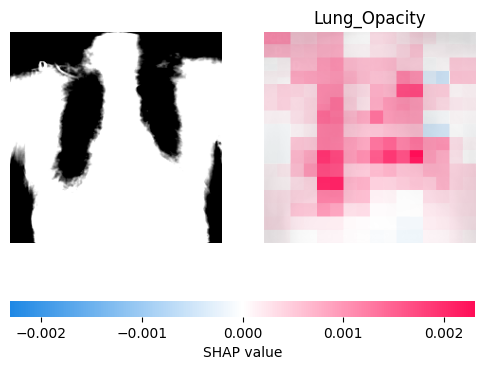

In [ ]:
#Covid part 1
shap.image_plot(all_values)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


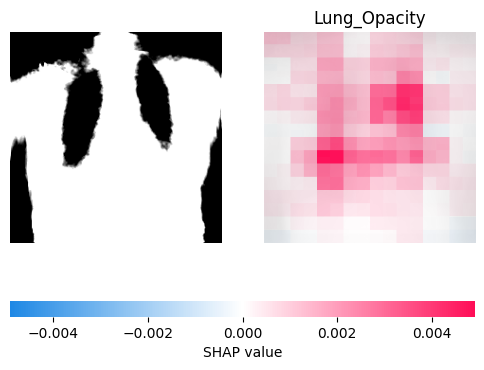

In [ ]:
#Covid part 2
shap.image_plot(all_values)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


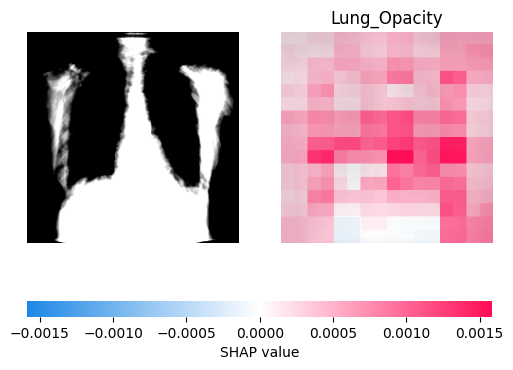

In [ ]:
#Normal part 1
shap.image_plot(all_values)

In [ ]:
predictions

[['Lung_Opacity'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal'],
 ['Normal']]